# Практика 5: Атака с ограниченной памятью (PGD - Projected Gradient Descent)

Выполнил: Асатрян Давид Робертович ББМО-01-23

# Цель:
Изучить одну из наиболее мощных атак на модели ИИ — атаку Carlini-Wagner (CW). Задача — научиться использовать CW для создания противоречивых примеров и исследовать влияние этой атаки на обученные модели

# Задачи:
Загрузить ранее обученную модель на датасете MNIST.
Изучить теоретические основы атаки Carlini-Wagner.
Реализовать атаку CW с помощью фреймворка Foolbox.
Оценить точность модели на противоречивых примерах и сравнить с результатами на обычных данных.

Шаг 1: Загруска библиотек

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Шаг 2: Загрузим обученную модель и данные MNIST

In [12]:
# Загрузка тестовых данных MNIST
(_, _), (test_images, test_labels) = mnist.load_data()

# Нормализация данных
test_images = test_images / 255.0
test_labels = to_categorical(test_labels, num_classes=10)

# Загрузка обученной модели
model = tf.keras.models.load_model('/content/mnist_model.h5')

# Проверка точности модели на обычных данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.1051
Test accuracy on clean images: 0.9746999740600586


Шаг 2: Реализация атаки PGD с использованием Foolbox.

In [13]:
!pip install foolbox

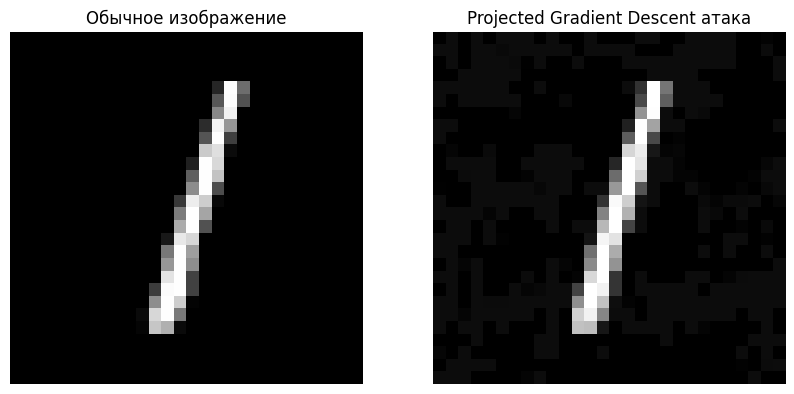

In [14]:
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))

# Создание атаки DeepFool
attack = fb.attacks.LinfPGD()

# Выбор изображения для атаки (например, первое изображение из тестового набора)
image = tf.convert_to_tensor(test_images[2], dtype=tf.float32)[None, ...]
label = tf.convert_to_tensor(np.argmax(test_labels[0]), dtype=tf.int64)

# Выполнение атаки
adversarial_image, _, success = attack(fmodel, image, label[None], epsilons=0.05)

# Вывод результатов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Обычное изображение")
plt.imshow(image[0].numpy(), cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Projected Gradient Descent атака")
plt.imshow(adversarial_image[0].numpy(), cmap="gray")
plt.axis('off')

plt.show()

Шаг 4: Оценка модели на противоречивых примерах

In [18]:
# Оценка точности до атаки
clean_accuracy = evaluate_accuracy(fmodel, test_images_tf, test_labels_np)
print(f"Точность модели на чистых данных: {clean_accuracy * 100:.2f}%")

# Параметры атаки
attack = fb.attacks.LinfPGD()
epsilons = 0.1

# Применение атаки на всем тестовом наборе
advs, _, success = attack(fmodel, test_images_tf, test_labels_np, epsilons=epsilons)

# Оценка точности после атаки
adversarial_accuracy = evaluate_accuracy(fmodel, advs, test_labels_np)
print(f"Точность модели после атаки: {adversarial_accuracy * 100:.2f}%")

Точность модели на чистых данных: 97.47%
Точность модели после атаки: 6.78%


Вывод:
Как види, точность снизилась с 97,47% до 6,78%, что показывает на уязвимость модели